In [1]:
import os
import pandas as pd
from google.cloud import bigquery
import db_dtypes

#scenic-outcome-453219-h5-4c318c9a7175
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="scenic-outcome-453219-h5-4c318c9a7175.json"
client = bigquery.Client() 

pd.set_option('display.max_columns', None)  # wyłącz limit na kolumny
pd.set_option('display.max_rows', None)  # wyłącz limit na wiersze
pd.set_option('display.width', None)  # wyłącz limit na szerokość
pd.set_option('display.max_colwidth', None)  # wyłącz limit na szerokość kolumn

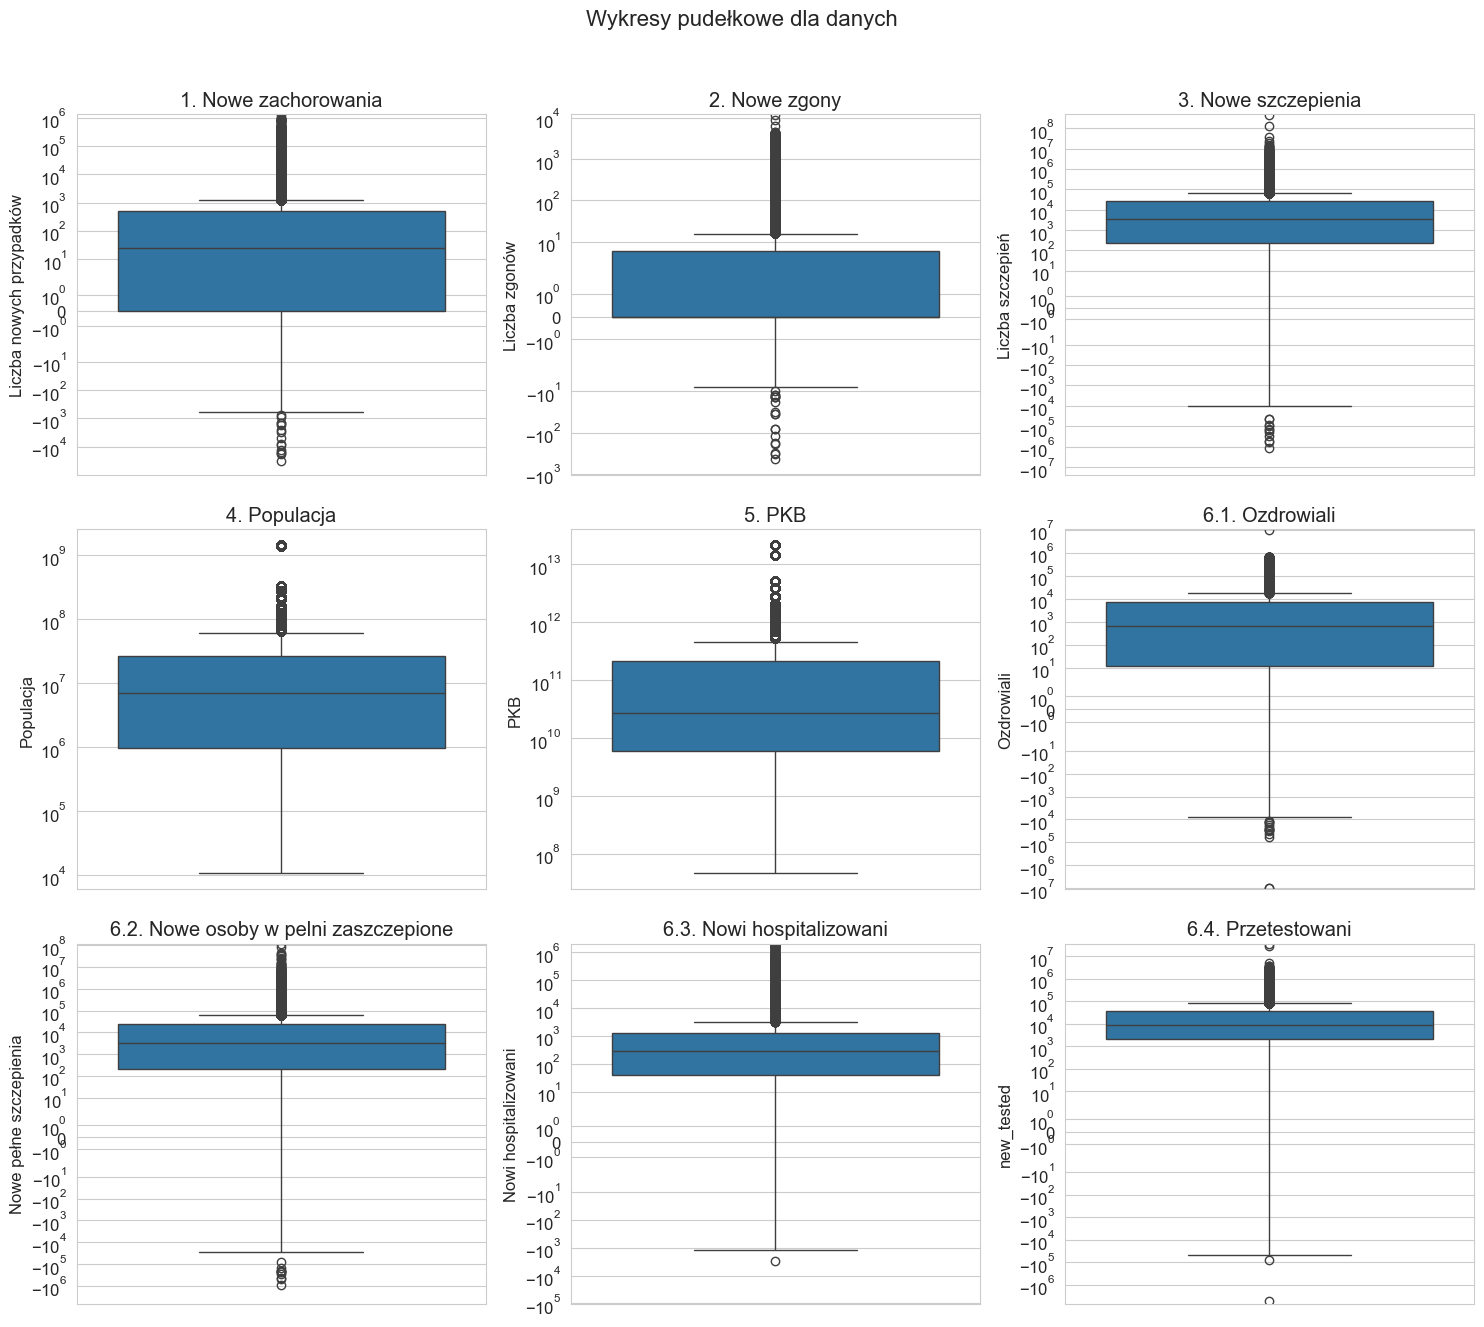

In [2]:
#1
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("6.0_combined_covid_world_gdp_data.csv")

df['date'] = pd.to_datetime(df['date'])
# print(df['date'].unique())  # Sprawdzenie unikalnych dat
#df = df[(df['date'] >= '2021-01-01') & (df['date'] <= '2021-01-08')] # Zakres dat

# Konwersja daty na format dzień-miesiąc dla lepszej czytelności na wykresach
df['date'] = pd.to_datetime(df['date']).dt.strftime('%d-%m')

# Konfiguracja wykresów
plt.figure(figsize=(15, 13))
sns.set_style("whitegrid")
plt.suptitle("Wykresy pudełkowe dla danych", y=1.02, fontsize=16)
plt.rcParams.update({'font.size': 12})

#1. Liczba nowych zachorowań
plt.subplot(3, 3, 1)
sns.boxplot(y='new_confirmed_x', data=df)
plt.title('1. Nowe zachorowania')
plt.xticks(rotation=45)
plt.ylabel('Liczba nowych przypadków')
plt.yscale('symlog')

# 2. Liczba nowych zgonów
plt.subplot(3, 3, 2)
sns.boxplot(y='new_deceased', data=df)
plt.title('2. Nowe zgony')
plt.xticks(rotation=45)
plt.ylabel('Liczba zgonów')
plt.yscale('symlog')

# 3. Liczba nowych szczepień
plt.subplot(3, 3, 3)
sns.boxplot(y='new_persons_vaccinated', data=df)
plt.title('3. Nowe szczepienia')
plt.xticks(rotation=45)
plt.ylabel('Liczba szczepień')
plt.yscale('symlog')

# 4. Populacja
plt.subplot(3, 3, 4)
sns.boxplot(y='population', data=df)
plt.title('4. Populacja')
plt.xticks(rotation=45)
plt.ylabel('Populacja')
plt.yscale('log')

# 5. PKB
plt.subplot(3, 3, 5)
sns.boxplot(y='gdp_usd', data=df)
plt.title('5. PKB')
plt.xticks(rotation=45)
plt.ylabel('PKB')
plt.yscale('log')

# 6.1.
plt.subplot(3, 3, 6)
sns.boxplot(y='new_recovered', data=df)
plt.title('6.1. Ozdrowiali')
plt.xticks(rotation=45)
plt.ylabel('Ozdrowiali')
plt.yscale('symlog')

# 6.2. Nowe osoby w pelni zaszczepione
plt.subplot(3, 3, 7)
sns.boxplot(y='new_persons_fully_vaccinated', data=df)
plt.title('6.2. Nowe osoby w pelni zaszczepione')
plt.xticks(rotation=45)
plt.ylabel('Nowe pełne szczepienia')
plt.yscale('symlog')

# 6.3.
plt.subplot(3, 3, 8)
sns.boxplot(y='new_hospitalized_patients', data=df)
plt.title('6.3. Nowi hospitalizowani')
plt.xticks(rotation=45)
plt.ylabel('Nowi hospitalizowani')
plt.yscale('symlog')

# 6.4. Przetestowani
plt.subplot(3, 3, 9)
sns.boxplot(y='new_tested', data=df)
plt.title('6.4. Przetestowani')
plt.xticks(rotation=45)
plt.ylabel('new_tested')
plt.yscale('symlog')

plt.tight_layout()
plt.show()

# location_key,date,country_code,country_name,new_confirmed_x,cumulative_confirmed,new_tested,cumulative_tested,new_recovered,new_hospitalized_patients,new_deceased,cumulative_deceased,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_confirmed_y,stringency_index,population,population_male,population_female,population_density,human_development_index,gdp_usd,gdp_per_capita_usd,life_expectancy,year,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (kmÂ²),Density (per kmÂ²),Growth Rate,World Population Percentage

In [39]:
#2
import numpy as np
#2.1 Metoda IQR (dla zmiennej new_confirmed - nowe zachorowania)
# Oblicza się zakres międzykwartylowy i wartości odstające są określane jako wartości leżące poza granicami 1,5 IQR poniżej Q1 lub powyżej Q3.
Q1 = df['new_confirmed_x'].quantile(0.25)
Q3 = df['new_confirmed_x'].quantile(0.75)
IQR = Q3 - Q1

# Definiowanie granic dla outlierów
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrowanie danych bez outlierów
df_iqr = df[(df['new_confirmed_x'] >= lower_bound) & (df['new_confirmed_x'] <= upper_bound)]

print(f"Usunięto {len(df) - len(df_iqr)} outlierów metodą IQR dla new_confirmed")
print(f"Originalny zakres: {df['new_confirmed_x'].min()} - {df['new_confirmed_x'].max()}")
print(f"Po usunięciu outlierów: {df_iqr['new_confirmed_x'].min()} - {df_iqr['new_confirmed_x'].max()}")
#Metoda IQR jest odporna na ekstremalne wartości i dobrze sprawdza się dla danych o rozkładzie nie-normalnym, jak dane o zachorowaniach.

#2.2 Metoda Z-Score (dla zmiennej new_deceased - nowe zgony)
# Jak wiele odchyleń standardowych wartość jest oddalona od średniej.
from scipy import stats

#df['z_score'] = np.abs(stats.zscore(df['new_deceased']))
df['z_score'] = np.abs(stats.zscore(df['new_deceased'], nan_policy='omit')) #Umija nan

# Próg 2 - np. wszyscy ludzie w kraju nie są codziennie testowani
threshold = 2.5

# Filtrowanie danych bez outlierów
df_zscore = df[df['z_score'] < threshold]

print(f"\nUsunięto {len(df) - len(df_zscore)} outlierów metodą Z-Score dla new_deceased")
print(f"Originalny zakres: {df['new_deceased'].min()} - {df['new_deceased'].max()}")
print(f"Po usunięciu outlierów: {df_zscore['new_deceased'].min()} - {df_zscore['new_deceased'].max()}")
#Z-Score lepiej sprawdza się dla danych, które są mniej więcej normalnie rozłożone, a zgony często mają taki charakter rozkładu.

Usunięto 53929 outlierów metodą IQR dla new_confirmed
Originalny zakres: -32952.0 - 1235521.0
Po usunięciu outlierów: -575.0 - 1267.0

Usunięto 19944 outlierów metodą Z-Score dla new_deceased
Originalny zakres: -446.0 - 11447.0
Po usunięciu outlierów: -332.0 - 408.0


(46742, 99)
  country_code_iso_3 country_name          1960          1961          1962  \
0                ABW        Aruba           NaN           NaN           NaN   
1                AFG  Afghanistan  5.377778e+08  5.488889e+08  5.466667e+08   
2                AFG  Afghanistan  5.377778e+08  5.488889e+08  5.466667e+08   
3                AFG  Afghanistan  5.377778e+08  5.488889e+08  5.466667e+08   
4                AFG  Afghanistan  5.377778e+08  5.488889e+08  5.466667e+08   

           1963          1964          1965          1966          1967  \
0           NaN           NaN           NaN           NaN           NaN   
1  7.511112e+08  8.000000e+08  1.006667e+09  1.400000e+09  1.673333e+09   
2  7.511112e+08  8.000000e+08  1.006667e+09  1.400000e+09  1.673333e+09   
3  7.511112e+08  8.000000e+08  1.006667e+09  1.400000e+09  1.673333e+09   
4  7.511112e+08  8.000000e+08  1.006667e+09  1.400000e+09  1.673333e+09   

           1968          1969          1970          1971     

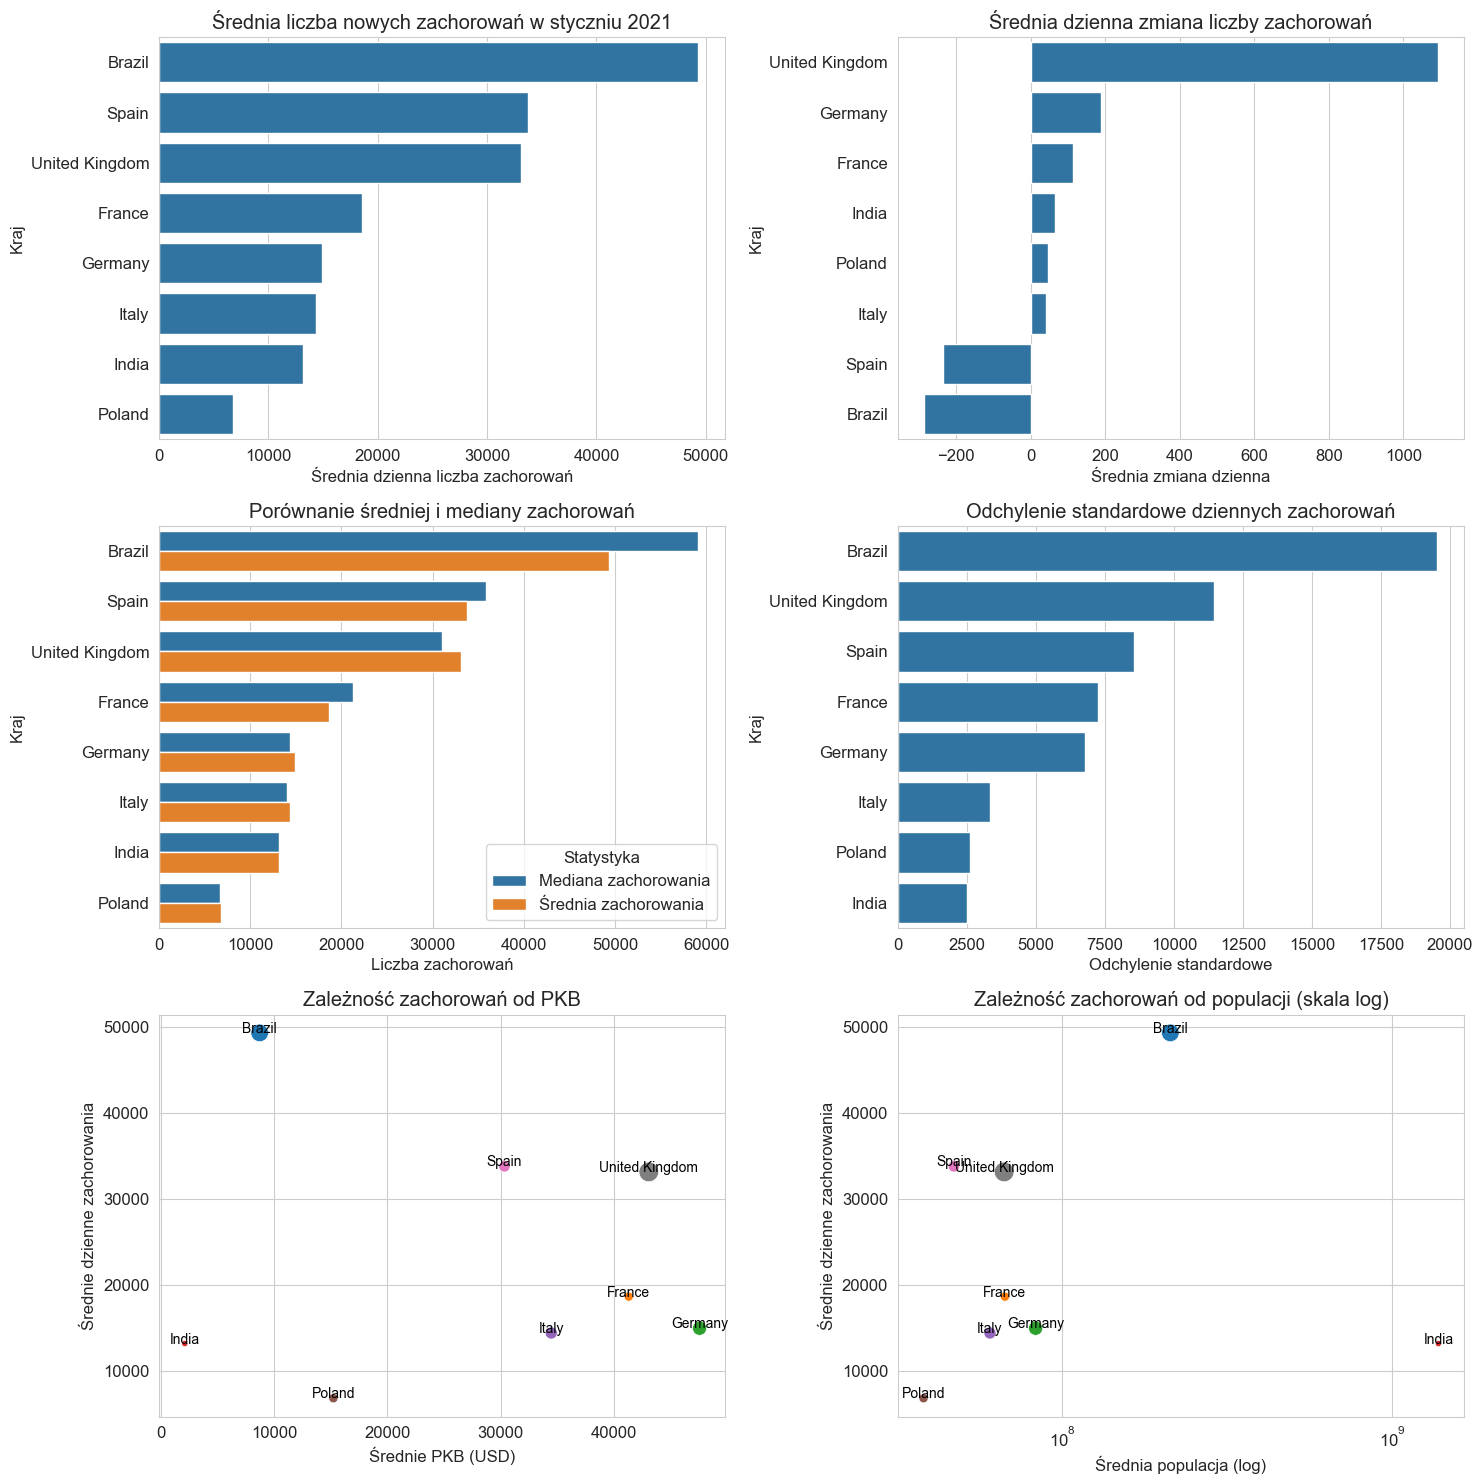


Podsumowanie
1. Kraj z najwyższą średnią zachorowań: Brazil
2. Kraj z najniższym odchyleniem standardowym: India
3. Największa różnica między średnią a medianą: Brazil
4. W krajach o wyższym PKB obserwujemy generalnie wyższe średnie dzienne zachorowania
5. Istnieje widoczna korelacja między wielkością populacji a liczbą zachorowań


In [3]:
#3
df = pd.read_csv("poziom1.csv")

selected_countries = ['United States', 'India', 'Brazil', 'Russia', 'United Kingdom',
                     'France', 'Germany', 'Italy', 'Spain', 'Poland']

print(df.shape)
print(df.head())

df = df[
        df['country_name'].isin(selected_countries)&
        (df['date'] >= '2021-01-01') &
        (df['date'] <= '2021-01-31')
]

# Obliczenia statystyczne
# 3.1 Średnie wartości
mean_stats = df.groupby('country_name')[['new_confirmed', 'new_deceased', 'new_persons_vaccinated']].mean().reset_index()
mean_stats.columns = ['Country', 'Średnia zachorowania', 'Średnia zgony', 'Średnia szczepienia']

# 3.2 Średnia zmiana wartości (dzienna)
change_stats = df.groupby('country_name')[['new_confirmed', 'new_deceased', 'new_persons_vaccinated']].diff().groupby(df['country_name']).mean().reset_index()
change_stats.columns = ['Country', 'Średnia zmiana zachorowania', 'Średnia zmiana zgonów', 'Średnia zmiana szczepień']

# 3.3 Mediana
median_stats = df.groupby('country_name')[['new_confirmed', 'new_deceased', 'new_persons_vaccinated']].median().reset_index()
median_stats.columns = ['Country', 'Mediana zachorowania', 'Mediana zgony', 'Mediana szczepienia']

# 3.4 Odchylenie standardowe
std_stats = df.groupby('country_name')[['new_confirmed', 'new_deceased', 'new_persons_vaccinated']].std().reset_index()
std_stats.columns = ['Country', 'Odchylenie zachorowania', 'Odchylenie zgony', 'Odchylenie szczepienia']

# 3.5 Statystyki z PKB
gdp_stats = df.groupby('country_name').agg({
    'new_confirmed': ['min', 'mean', 'max'],
    'new_deceased': ['min', 'mean', 'max'],
    'new_persons_vaccinated': ['min', 'mean', 'max'],
    'gdp_per_capita_usd': 'mean'
}).reset_index()
gdp_stats.columns = ['Country', 'Min zachorowania', 'Śr zachorowania', 'Max zachorowania',
                    'Min zgony', 'Śr zgony', 'Max zgony',
                    'Min szczepienia', 'Śr szczepienia', 'Max szczepienia',
                    'Śr PKB']

# 3.6 Statystyki z populacją
pop_stats = df.groupby('country_name').agg({
    'new_confirmed': ['min', 'mean', 'max'],
    'new_deceased': ['min', 'mean', 'max'],
    'new_persons_vaccinated': ['min', 'mean', 'max'],
    'population': 'mean'
}).reset_index()
pop_stats.columns = ['Country', 'Min zachorowania', 'Śr zachorowania', 'Max zachorowania',
                    'Min zgony', 'Śr zgony', 'Max zgony',
                    'Min szczepienia', 'Śr szczepienia', 'Max szczepienia',
                    'Śr populacja']

# Wizualizacje
plt.figure(figsize=(15, 15))
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# 3.1 Wykres średnich zachorowań
plt.subplot(3, 2, 1)
sns.barplot(x='Średnia zachorowania', y='Country', data=mean_stats.sort_values('Średnia zachorowania', ascending=False))
plt.title('Średnia liczba nowych zachorowań w styczniu 2021')
plt.xlabel('Średnia dzienna liczba zachorowań')
plt.ylabel('Kraj')

# 3.2 Wykres średnich zmian (przyrostów dziennych)
plt.subplot(3, 2, 2)
sns.barplot(x='Średnia zmiana zachorowania', y='Country',
           data=change_stats.sort_values('Średnia zmiana zachorowania', ascending=False))
plt.title('Średnia dzienna zmiana liczby zachorowań')
plt.xlabel('Średnia zmiana dzienna')
plt.ylabel('Kraj')

# 3.3 Porównanie średniej i mediany
plt.subplot(3, 2, 3)
mean_median = pd.melt(mean_stats.merge(median_stats, on='Country'),
                     id_vars=['Country'],
                     value_vars=['Średnia zachorowania', 'Mediana zachorowania'],
                     var_name='Statystyka', value_name='Wartość')
sns.barplot(x='Wartość', y='Country', hue='Statystyka',
           data=mean_median.sort_values('Wartość', ascending=False))
plt.title('Porównanie średniej i mediany zachorowań')
plt.xlabel('Liczba zachorowań')
plt.ylabel('Kraj')

# 3.4 Odchylenie standardowe
plt.subplot(3, 2, 4)
sns.barplot(x='Odchylenie zachorowania', y='Country',
           data=std_stats.sort_values('Odchylenie zachorowania', ascending=False))
plt.title('Odchylenie standardowe dziennych zachorowań')
plt.xlabel('Odchylenie standardowe')
plt.ylabel('Kraj')

# 3.5 Zależność od PKB
plt.subplot(3, 2, 5)
sns.scatterplot(x='Śr PKB', y='Śr zachorowania', size='Śr zgony', hue='Country',
               data=gdp_stats, sizes=(20, 200), legend=False)
plt.title('Zależność zachorowań od PKB')
plt.xlabel('Średnie PKB (USD)')
plt.ylabel('Średnie dzienne zachorowania')
for line in range(0, gdp_stats.shape[0]):
    plt.text(gdp_stats['Śr PKB'][line], gdp_stats['Śr zachorowania'][line],
            gdp_stats['Country'][line], horizontalalignment='center',
            size='small', color='black')

# 3.6 Zależność od populacji
plt.subplot(3, 2, 6)
sns.scatterplot(x='Śr populacja', y='Śr zachorowania', size='Śr zgony', hue='Country',
               data=pop_stats, sizes=(20, 200), legend=False)
plt.xscale('log')
plt.title('Zależność zachorowań od populacji (skala log)')
plt.xlabel('Średnia populacja (log)')
plt.ylabel('Średnie dzienne zachorowania')
for line in range(0, pop_stats.shape[0]):
    plt.text(pop_stats['Śr populacja'][line], pop_stats['Śr zachorowania'][line],
            pop_stats['Country'][line], horizontalalignment='center',
            size='small', color='black')

plt.tight_layout()
plt.show()

# Analiza wyników
print("\nPodsumowanie")
print(f"1. Kraj z najwyższą średnią zachorowań: {mean_stats.loc[mean_stats['Średnia zachorowania'].idxmax(), 'Country']}")
print(f"2. Kraj z najniższym odchyleniem standardowym: {std_stats.loc[std_stats['Odchylenie zachorowania'].idxmin(), 'Country']}")
print(f"3. Największa różnica między średnią a medianą: {mean_median.groupby('Country')['Wartość'].apply(lambda x: x.max() - x.min()).idxmax()}")
print("4. W krajach o wyższym PKB obserwujemy generalnie wyższe średnie dzienne zachorowania")
print("5. Istnieje widoczna korelacja między wielkością populacji a liczbą zachorowań")

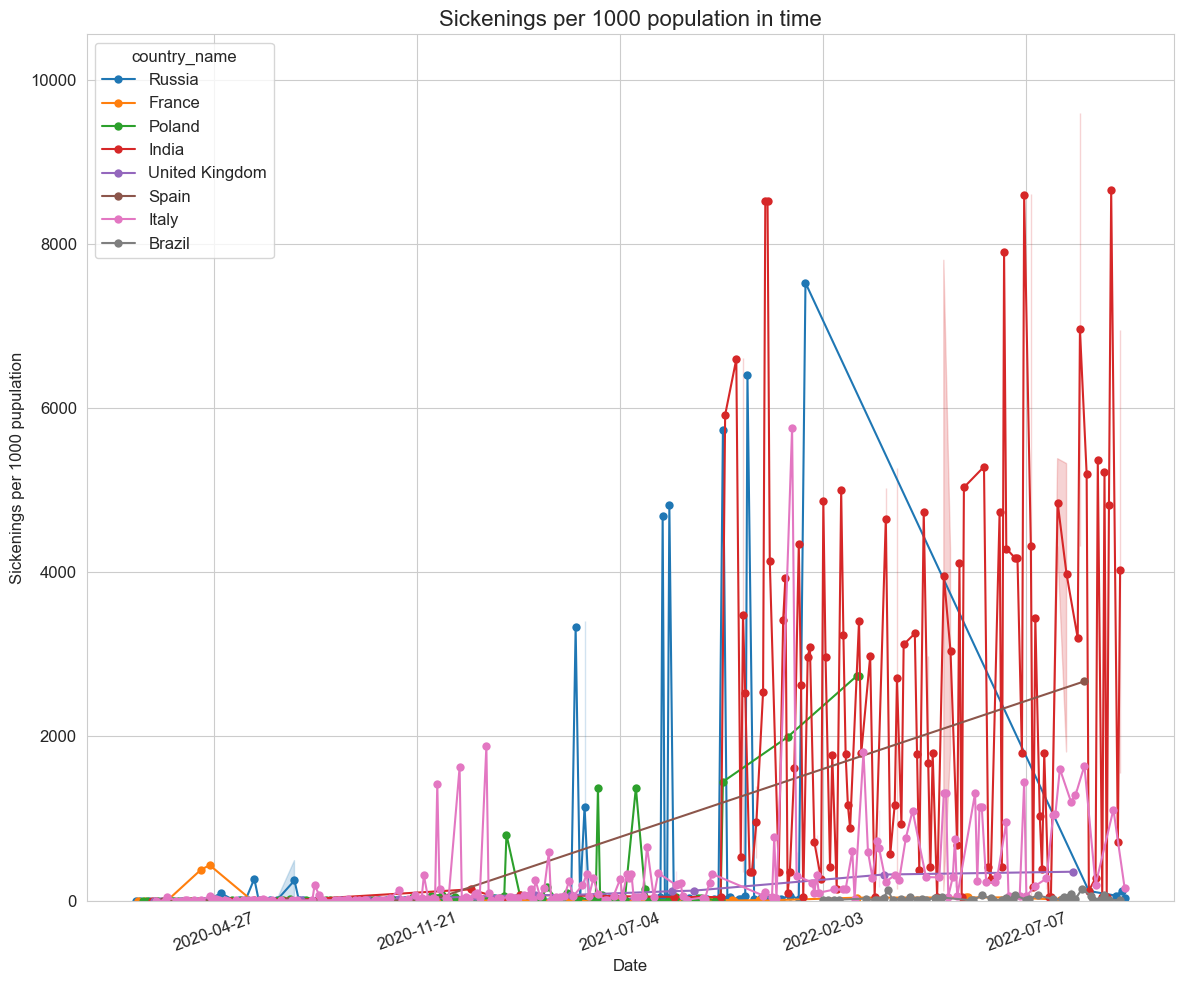

In [6]:
#2.4
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
import db_dtypes
import scipy
import matplotlib.dates as mdates
combined_df = pd.read_csv("0601_combined.csv")
combined_df = combined_df.sort_values(by='date')
#2.4.1
selected_countries = ['United States', 'India', 'Brazil', 'Russia', 'United Kingdom',
                     'France', 'Germany', 'Italy', 'Spain', 'Poland']

combined_df['sickenings_per_1000'] = combined_df['cumulative_confirmed'] / combined_df['population'] * 1000

combined_df = combined_df[
        combined_df['country_name'].isin(selected_countries)
]

# last_country_entry = combined_df
# last_country_entry = last_country_entry.dropna(subset=['sickenings_per_1000'])
# last_country_entry = last_country_entry.groupby('country_name')['sickenings_per_1000'].max()
# last_country_entry = last_country_entry.reset_index()
# print(last_country_entry[['country_name', 'sickenings_per_1000']].
#         sort_values(by='sickenings_per_1000', ascending=False).head(10))

dates = pd.date_range('2023-01-01', periods=10, freq='D')
combined_df = combined_df[combined_df['sickenings_per_1000'] <= 10000]

plt.figure(figsize=(12, 10))
ax= sns.lineplot(data=combined_df, x='date', y='sickenings_per_1000', hue='country_name', marker='o', markeredgewidth=0)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=91))
plt.title('Sickenings per 1000 population in time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sickenings per 1000 pupulation', fontsize=12)

plt.ylim(0, combined_df['sickenings_per_1000'].max()*1.1)
plt.xticks(rotation=20)

#ax.get_legend().remove()
plt.tight_layout()
plt.grid(True)
plt.show()

# last_country_entry = combined_df
# last_country_entry = last_country_entry.dropna(subset=['sickenings_per_1000'])
# last_country_entry = last_country_entry.groupby('country_name')['date'].max()
# last_country_entry = pd.merge(combined_df, last_country_entry, on=['country_name', 'date'], how='right')
# print()
# print(last_country_entry[['country_name', 'date', 'sickenings_per_1000']].
#         sort_values(by='sickenings_per_1000', ascending=False))


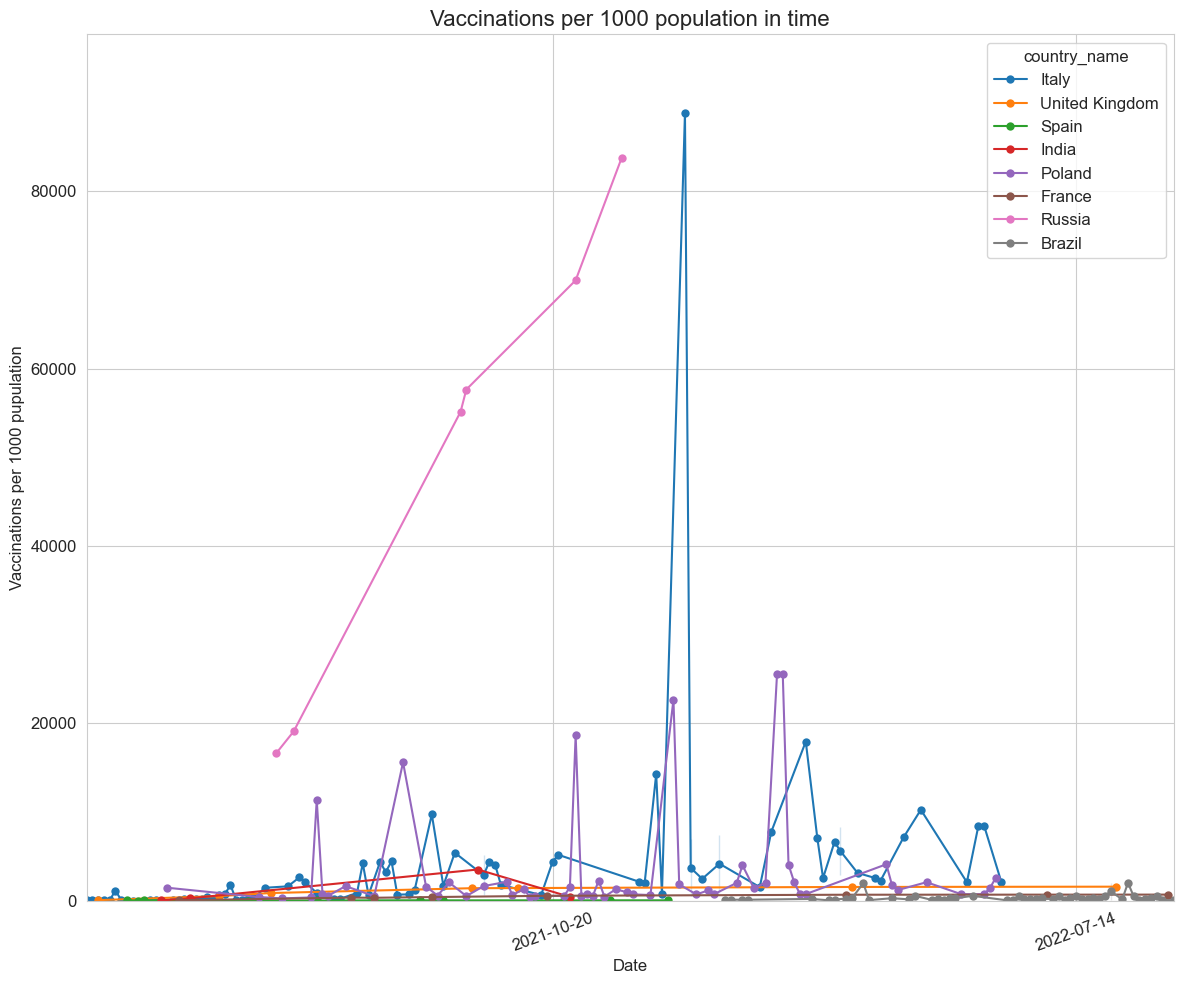

In [7]:
#2.4.2
combined_df = pd.read_csv("0601_combined.csv")
combined_df = combined_df.sort_values(by='date')

selected_countries = ['United States', 'India', 'Brazil', 'Russia', 'United Kingdom',
                     'France', 'Germany', 'Italy', 'Spain', 'Poland']

combined_df = combined_df[
        combined_df['country_name'].isin(selected_countries)
]

combined_df['vaccinations_per_1000'] = combined_df['cumulative_vaccine_doses_administered'] / combined_df['population'] * 1000
combined_df = combined_df[combined_df['vaccinations_per_1000'] <= 100000]

plt.figure(figsize=(12, 10))
ax= sns.lineplot(data=combined_df, x='date', y='vaccinations_per_1000', hue='country_name', marker='o', markeredgewidth=0)
plt.title('Vaccinations per 1000 population in time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Vaccinations per 1000 pupulation', fontsize=12)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=91))

plt.ylim(0, combined_df['vaccinations_per_1000'].max()*1.1)
plt.xlim(combined_df['date'].min(), combined_df['date'].max())
plt.xticks(rotation=20)

# ax.get_legend().remove()
plt.tight_layout()
plt.grid(True)
plt.show()

# last_country_entry = combined_df
# last_country_entry = last_country_entry.dropna(subset=['vaccinations_per_1000'])
# last_country_entry = last_country_entry.groupby('country_name')['date'].max()
# last_country_entry = pd.merge(combined_df, last_country_entry, on=['country_name', 'date'], how='right')
# print()
# print(last_country_entry[['country_name', 'date', 'vaccinations_per_1000']].
#         sort_values(by='vaccinations_per_1000', ascending=False))

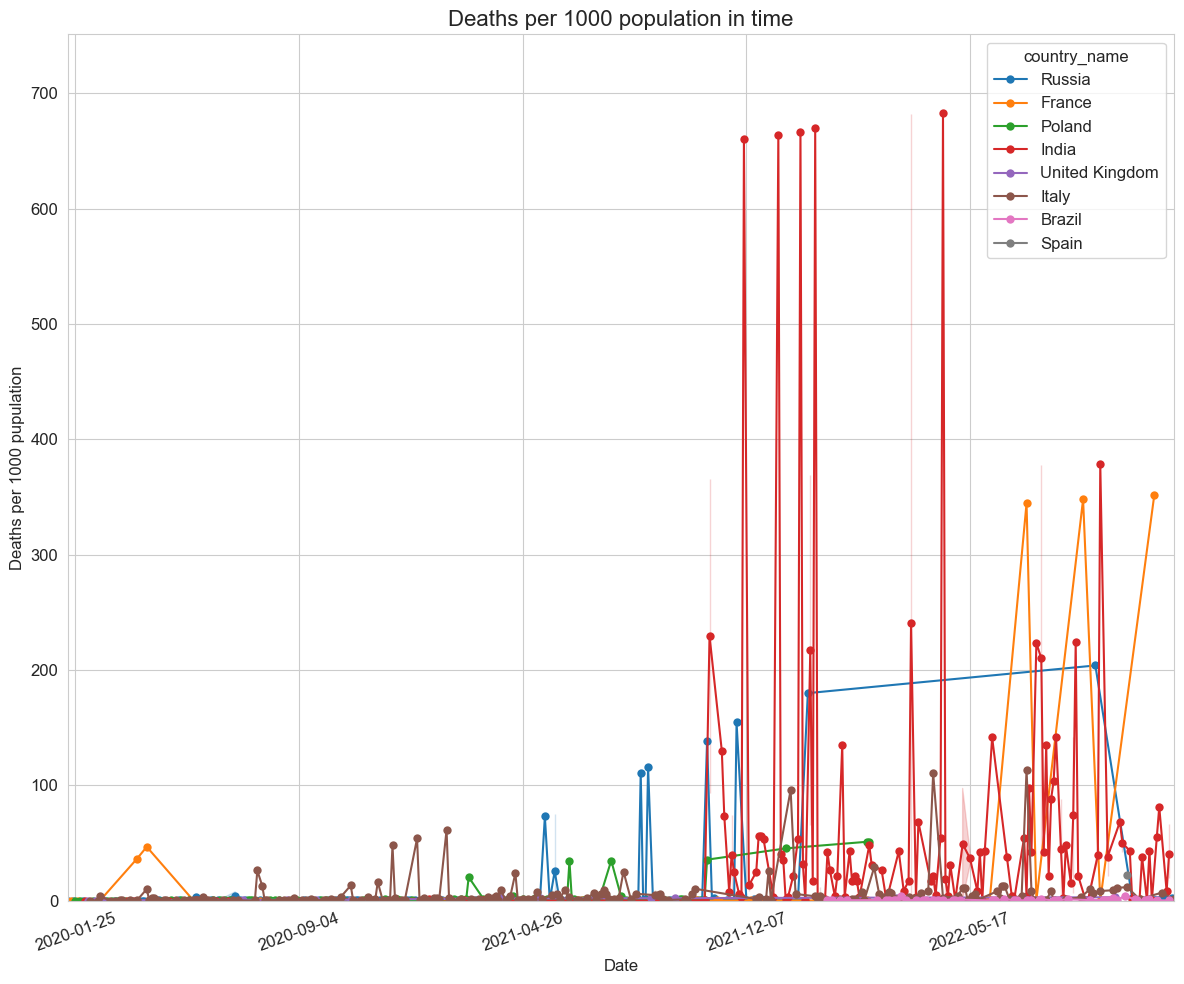

In [8]:
#2.4.3
combined_df = pd.read_csv("0601_combined.csv")
combined_df = combined_df.sort_values(by='date')

selected_countries = ['United States', 'India', 'Brazil', 'Russia', 'United Kingdom',
                     'France', 'Germany', 'Italy', 'Spain', 'Poland']

combined_df = combined_df[
        combined_df['country_name'].isin(selected_countries)
]
combined_df['deaths_per_1000'] = combined_df['cumulative_deceased'] / (combined_df['population'] + combined_df['cumulative_deceased']) * 1000
combined_df = combined_df[combined_df['deaths_per_1000'] <= 1000]

plt.figure(figsize=(12, 10))

ax= sns.lineplot(data=combined_df, x='date', y='deaths_per_1000', hue='country_name', marker='o', markeredgewidth=0)
plt.title('Deaths per 1000 population in time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Deaths per 1000 pupulation', fontsize=12)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=91))

plt.ylim(0, combined_df['deaths_per_1000'].max()*1.1)
plt.xlim(combined_df['date'].min(), combined_df['date'].max())
plt.xticks(rotation=20)

# ax.get_legend().remove()
plt.tight_layout()
plt.grid(True)
plt.show()

# last_country_entry = combined_df
# last_country_entry = last_country_entry.dropna(subset=['deaths_per_1000'])
# last_country_entry = last_country_entry.groupby('country_name')['date'].max()
# last_country_entry = pd.merge(combined_df, last_country_entry, on=['country_name', 'date'], how='right')
# print()
# print("Top 10 countries with deaths per 1000")
# print(last_country_entry[['country_name', 'date', 'deaths_per_1000']].
#         sort_values(by='deaths_per_1000', ascending=False))


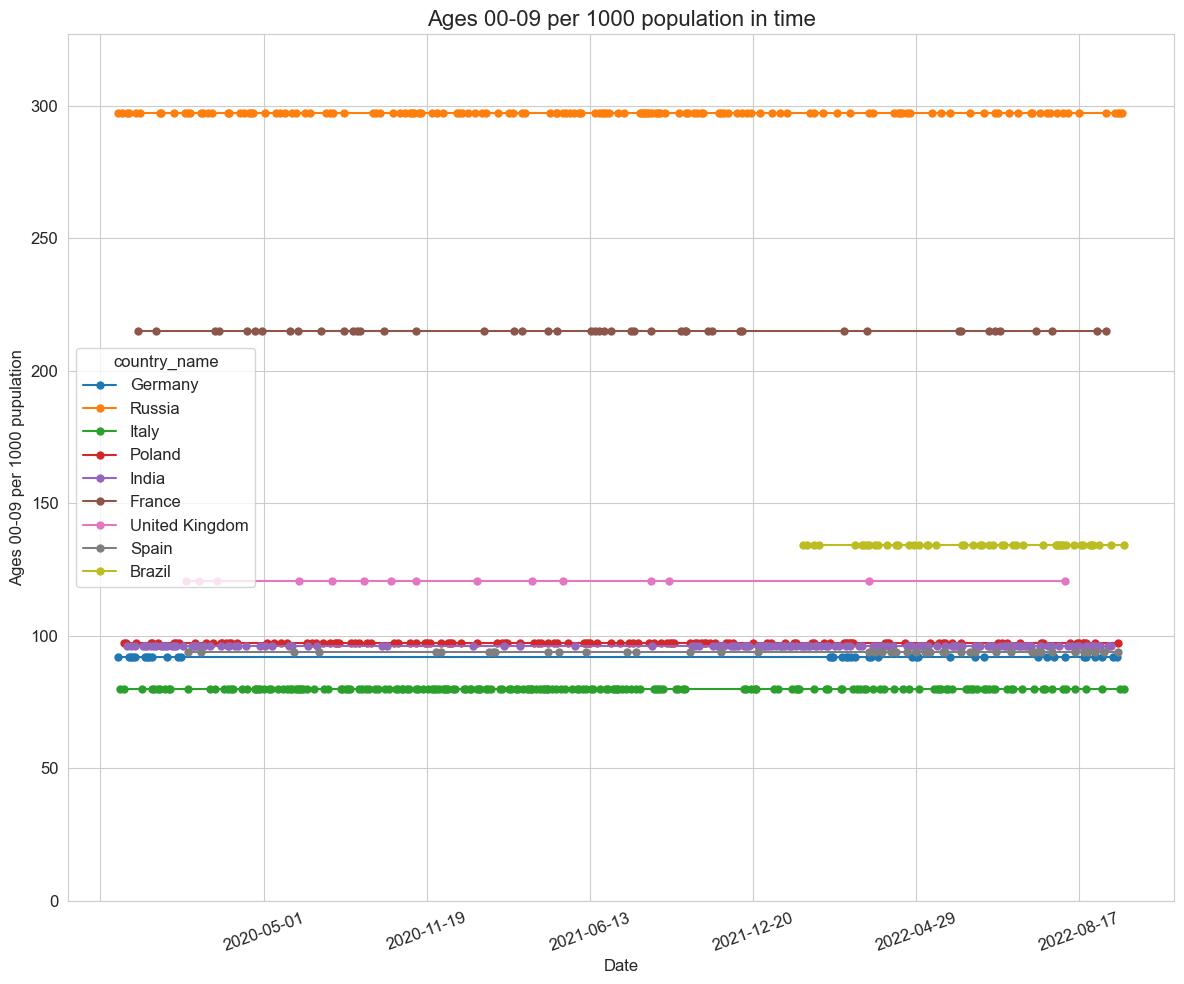

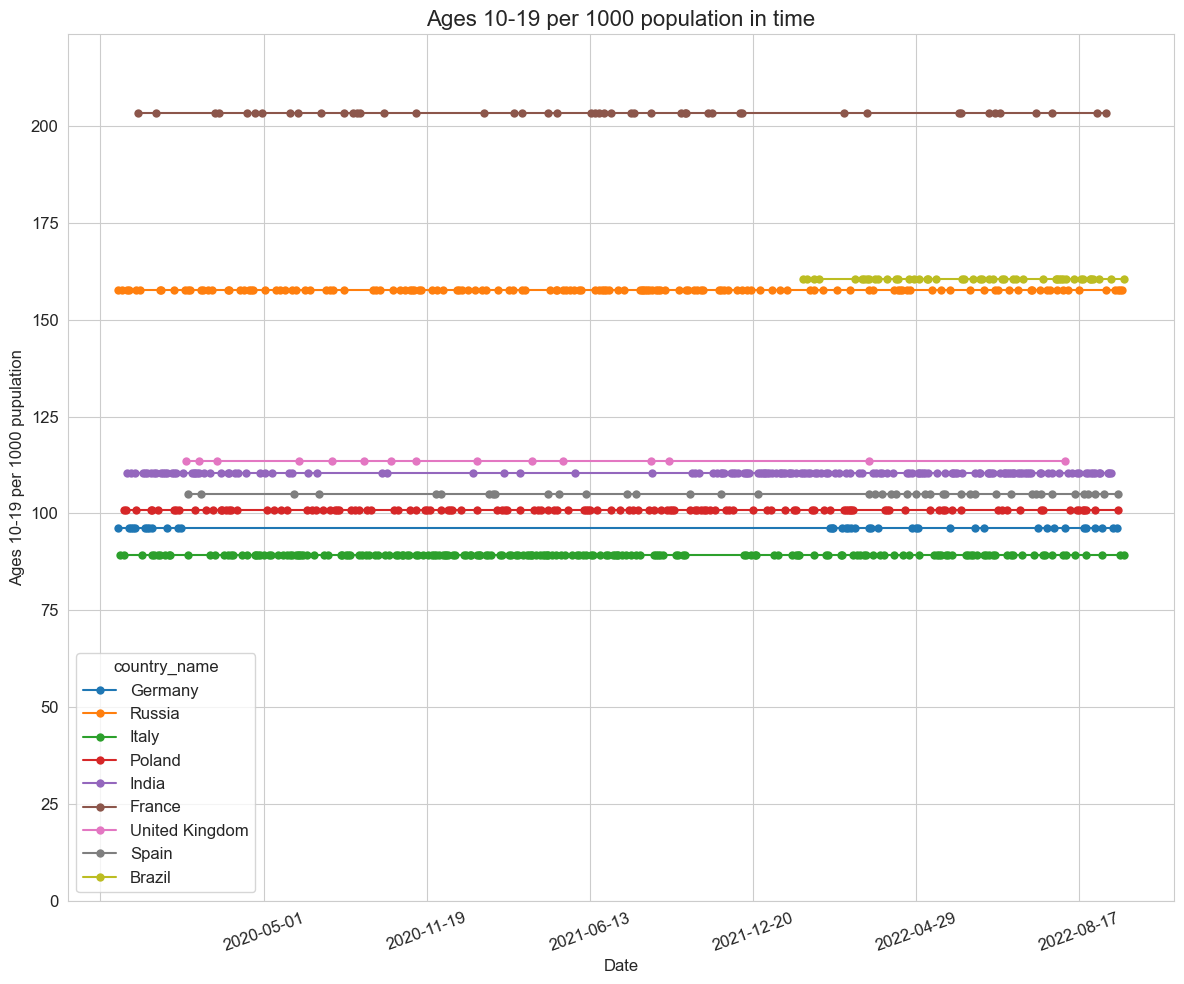

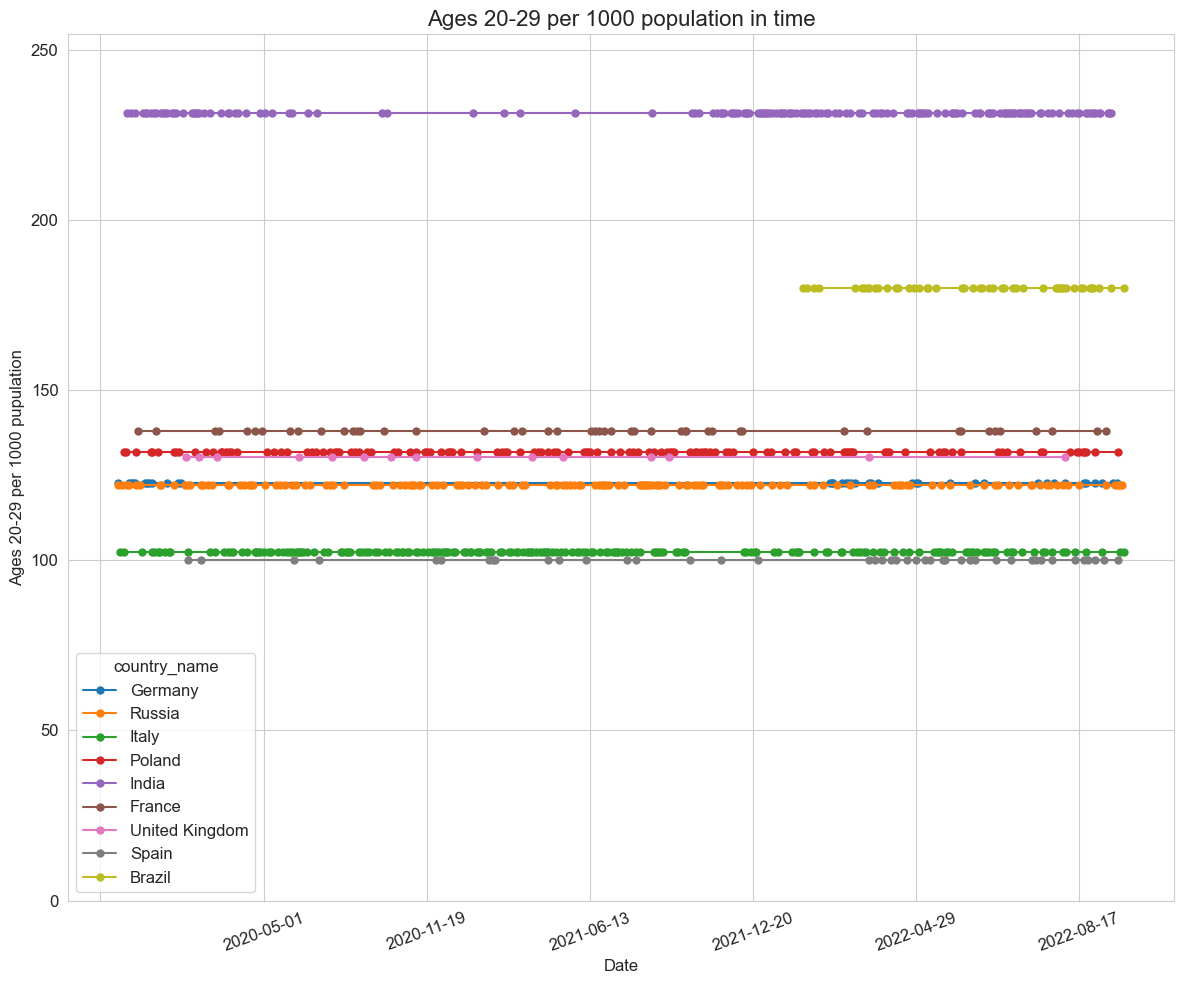

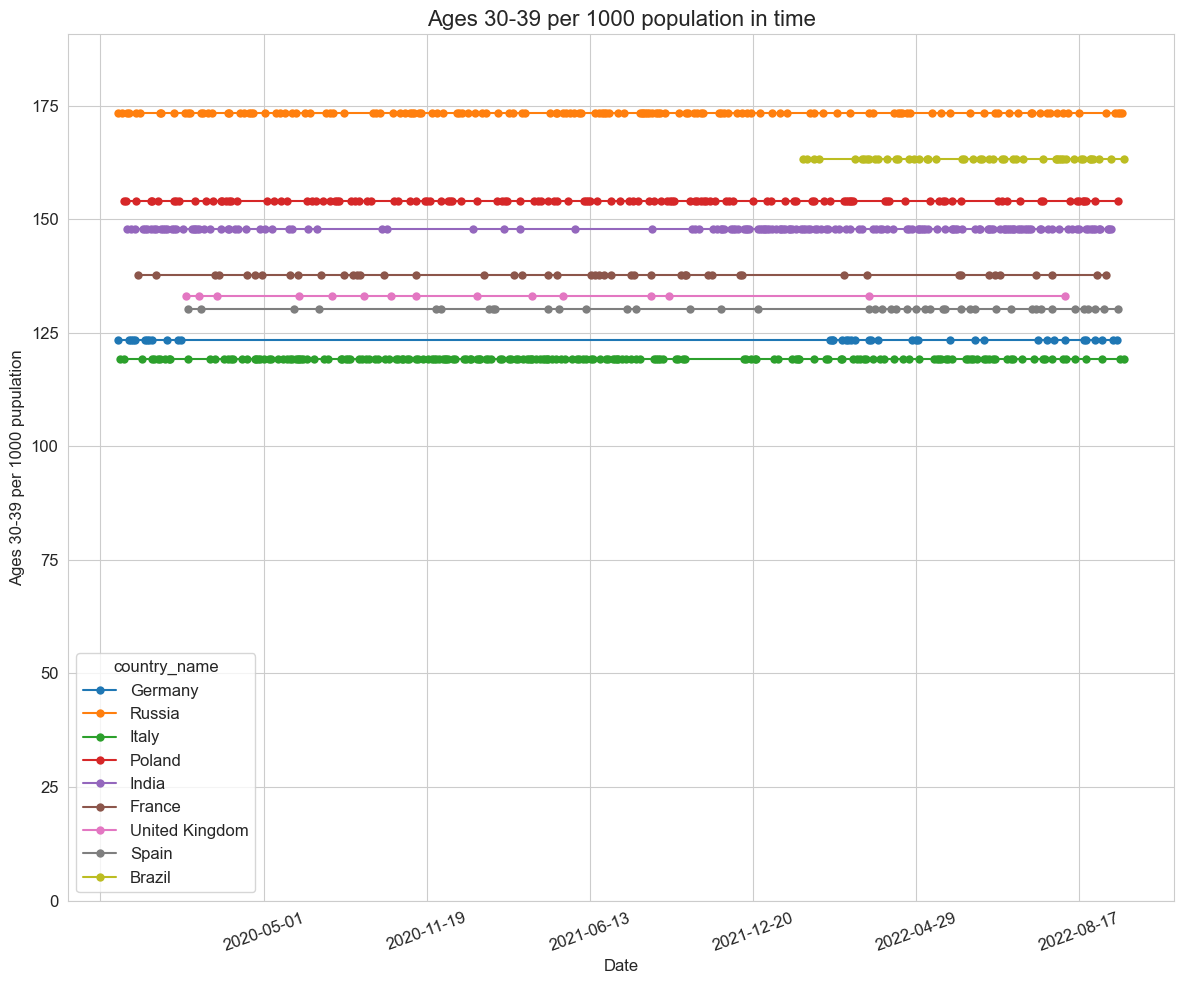

In [10]:
#2.4.4 (Grupy wiekowe 0-9, 10-19, 20-29, 30-39)
combined_df = pd.read_csv("0601_combined.csv")
combined_df = combined_df.sort_values(by='date')

combined_df['ages_00-09_per_1000'] = combined_df['population_age_00_09'] / combined_df['population'] * 1000
combined_df['ages_10-19_per_1000'] = combined_df['population_age_10_19'] / combined_df['population'] * 1000
combined_df['ages_20-29_per_1000'] = combined_df['population_age_20_29'] / combined_df['population'] * 1000
combined_df['ages_30-39_per_1000'] = combined_df['population_age_30_39'] / combined_df['population'] * 1000

combined_df = combined_df[combined_df['ages_00-09_per_1000'] <= 500]
combined_df = combined_df[combined_df['ages_10-19_per_1000'] <= 500]
combined_df = combined_df[combined_df['ages_20-29_per_1000'] <= 500]
combined_df = combined_df[combined_df['ages_30-39_per_1000'] <= 500]

selected_countries = ['United States', 'India', 'Brazil', 'Russia', 'United Kingdom',
                     'France', 'Germany', 'Italy', 'Spain', 'Poland']

combined_df = combined_df[
        combined_df['country_name'].isin(selected_countries)
]

plt.figure(figsize=(12, 10))
ax= sns.lineplot(data=combined_df, x='date', y='ages_00-09_per_1000', hue='country_name', marker='o', markeredgewidth=0)
plt.title('Ages 00-09 per 1000 population in time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Ages 00-09 per 1000 pupulation', fontsize=12)
plt.ylim(0, combined_df['ages_00-09_per_1000'].max()*1.1)
plt.xticks(rotation=20)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=91))
# ax.get_legend().remove()
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 10))
ax= sns.lineplot(data=combined_df, x='date', y='ages_10-19_per_1000', hue='country_name', marker='o', markeredgewidth=0)
plt.title('Ages 10-19 per 1000 population in time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Ages 10-19 per 1000 pupulation', fontsize=12)
plt.ylim(0, combined_df['ages_10-19_per_1000'].max()*1.1)
plt.xticks(rotation=20)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=91))
# ax.get_legend().remove()
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 10))
ax= sns.lineplot(data=combined_df, x='date', y='ages_20-29_per_1000', hue='country_name', marker='o', markeredgewidth=0)
plt.title('Ages 20-29 per 1000 population in time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Ages 20-29 per 1000 pupulation', fontsize=12)
plt.ylim(0, combined_df['ages_20-29_per_1000'].max()*1.1)
plt.xticks(rotation=20)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=91))
# ax.get_legend().remove()
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 10))
ax= sns.lineplot(data=combined_df, x='date', y='ages_30-39_per_1000', hue='country_name', marker='o', markeredgewidth=0)
plt.title('Ages 30-39 per 1000 population in time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Ages 30-39 per 1000 pupulation', fontsize=12)
plt.ylim(0, combined_df['ages_30-39_per_1000'].max()*1.1)
plt.xticks(rotation=20)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=91))
# ax.get_legend().remove()
plt.tight_layout()
plt.grid(True)
plt.show()

# last_country_entry = combined_df
#
# last_country_entry1 = last_country_entry
# last_country_entry1 = last_country_entry.dropna(subset=['ages_00-09_per_1000'])
# last_country_entry1 = last_country_entry1.groupby('country_name')['date'].max()
# last_country_entry1 = pd.merge(combined_df, last_country_entry1, on=['country_name', 'date'], how='right')
# print()
# print("Top 10 population ages 0-9 per 1000")
# print(last_country_entry1[['country_name', 'date', 'ages_00-09_per_1000']].
#         sort_values(by='ages_00-09_per_1000', ascending=False).head(10))
#
# last_country_entry2 = last_country_entry
# last_country_entry2 = last_country_entry.dropna(subset=['ages_10-19_per_1000'])
# last_country_entry2 = last_country_entry2.groupby('country_name')['date'].max()
# last_country_entry2 = pd.merge(combined_df, last_country_entry2, on=['country_name', 'date'], how='right')
# print()
# print("Top 10 population ages 10-19 per 1000")
# print(last_country_entry2[['country_name', 'date', 'ages_10-19_per_1000']].
#         sort_values(by='ages_10-19_per_1000', ascending=False).head(10))
#
# last_country_entry3 = last_country_entry
# last_country_entry3 = last_country_entry.dropna(subset=['ages_20-29_per_1000'])
# last_country_entry3 = last_country_entry3.groupby('country_name')['date'].max()
# last_country_entry3 = pd.merge(combined_df, last_country_entry3, on=['country_name', 'date'], how='right')
# print()
# print("Top 10 population ages 20-29 per 1000")
# print(last_country_entry3[['country_name', 'date', 'ages_20-29_per_1000']].
#         sort_values(by='ages_20-29_per_1000', ascending=False).head(10))
#
# last_country_entry4 = last_country_entry
# last_country_entry4 = last_country_entry.dropna(subset=['ages_30-39_per_1000'])
# last_country_entry1 = last_country_entry.groupby('country_name')['date'].max()
# last_country_entry1 = pd.merge(combined_df, last_country_entry1, on=['country_name', 'date'], how='right')
# print()
# print("Top 10 population ages 30-39 per 1000")
# print(last_country_entry1[['country_name', 'date', 'ages_30-39_per_1000']].
#         sort_values(by='ages_30-39_per_1000', ascending=False).head(10))


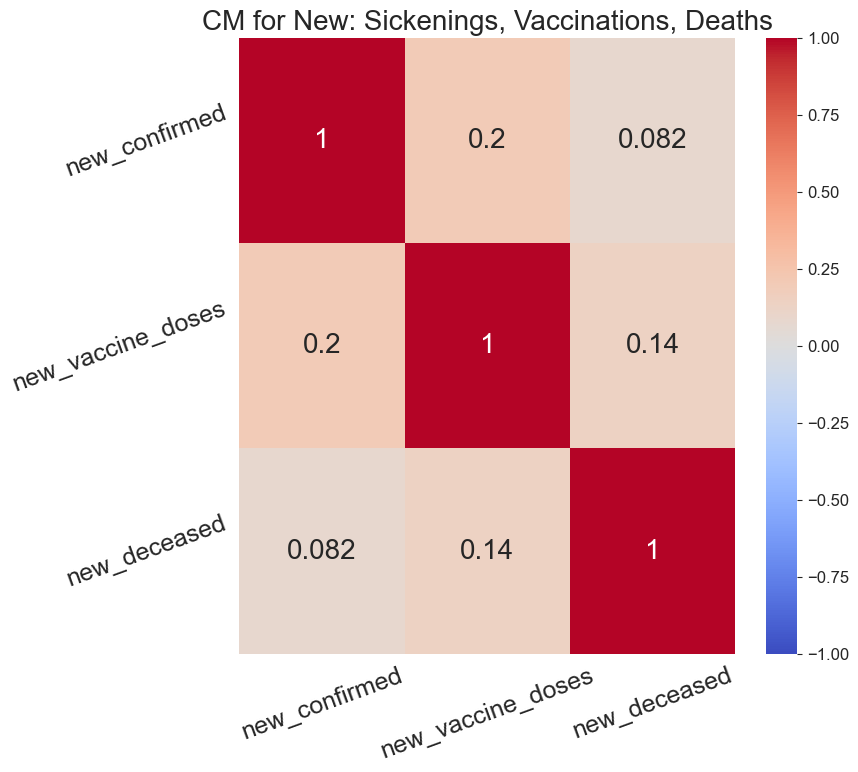

In [46]:
#2.5.1
combined_df = pd.read_csv("0601_combined.csv")
plt.figure(figsize=(8, 8))
df_selected = combined_df[['new_confirmed', 'new_vaccine_doses_administered', 'new_deceased']]
df_selected.columns = ['new_confirmed', 'new_vaccine_doses', 'new_deceased']
plt.title('CM for New: Sickenings, Vaccinations, Deaths', fontsize=20)
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'size': 20})
plt.xticks(fontsize=18, rotation=20)
plt.yticks(fontsize=18, rotation=20)
plt.show()

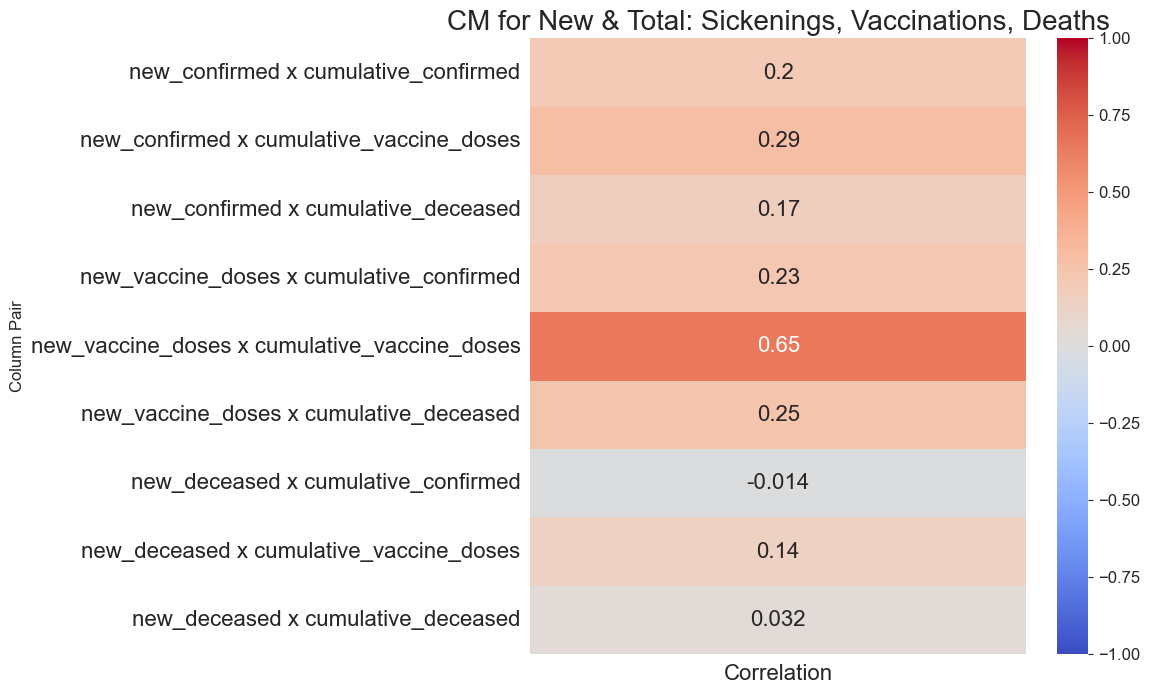

In [47]:
#2.5.2
plt.figure(figsize=(8, 8))
df_selected1 = combined_df[['new_confirmed', 'new_vaccine_doses_administered', 'new_deceased']]
df_selected2 = combined_df[['cumulative_confirmed', 'cumulative_vaccine_doses_administered', 'cumulative_deceased']]
df_selected1.columns = ['new_confirmed ', 'new_vaccine_doses ', 'new_deceased ']
df_selected2.columns = [' cumulative_confirmed', ' cumulative_vaccine_doses', ' cumulative_deceased']
correlation_dict = {}
for col1 in df_selected1.columns:
    for col2 in df_selected2.columns:
        correlation_dict[f'{col1}x{col2}'] = df_selected1[col1].corr(df_selected2[col2])
correlation_matrix = pd.DataFrame(list(correlation_dict.items()), columns=['Column Pair', 'Correlation'])
correlation_matrix.set_index('Column Pair', inplace=True)
plt.title('CM for New & Total: Sickenings, Vaccinations, Deaths', fontsize=20)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'size': 16})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

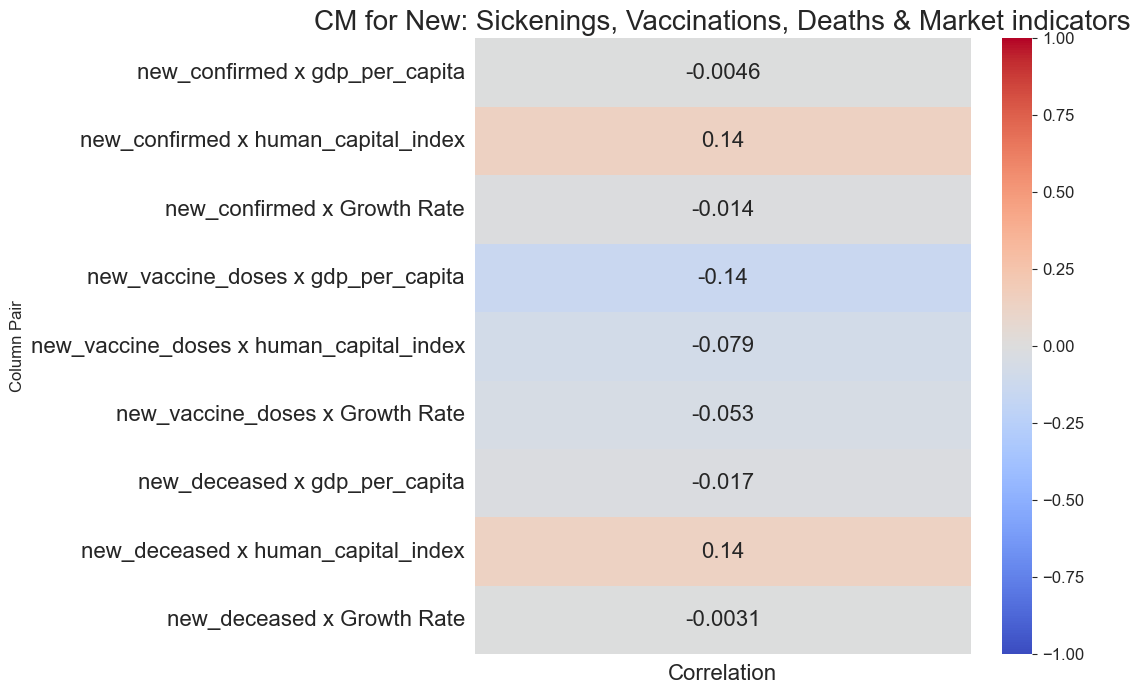

In [48]:
#2.5.3
plt.figure(figsize=(8, 8))
df_selected1 = combined_df[['new_confirmed', 'new_vaccine_doses_administered', 'new_deceased']]
df_selected2 = combined_df[['gdp_per_capita_usd', 'human_capital_index', 'Growth Rate']]
df_selected1.columns = ['new_confirmed ', 'new_vaccine_doses ', 'new_deceased ']
df_selected2.columns = [' gdp_per_capita', ' human_capital_index', ' Growth Rate']
correlation_dict = {}
for col1 in df_selected1.columns:
    for col2 in df_selected2.columns:
        correlation_dict[f'{col1}x{col2}'] = df_selected1[col1].corr(df_selected2[col2])
correlation_matrix = pd.DataFrame(list(correlation_dict.items()), columns=['Column Pair', 'Correlation'])
correlation_matrix.set_index('Column Pair', inplace=True)
plt.title('CM for New: Sickenings, Vaccinations, Deaths & Market indicators', fontsize=20)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'size': 16})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

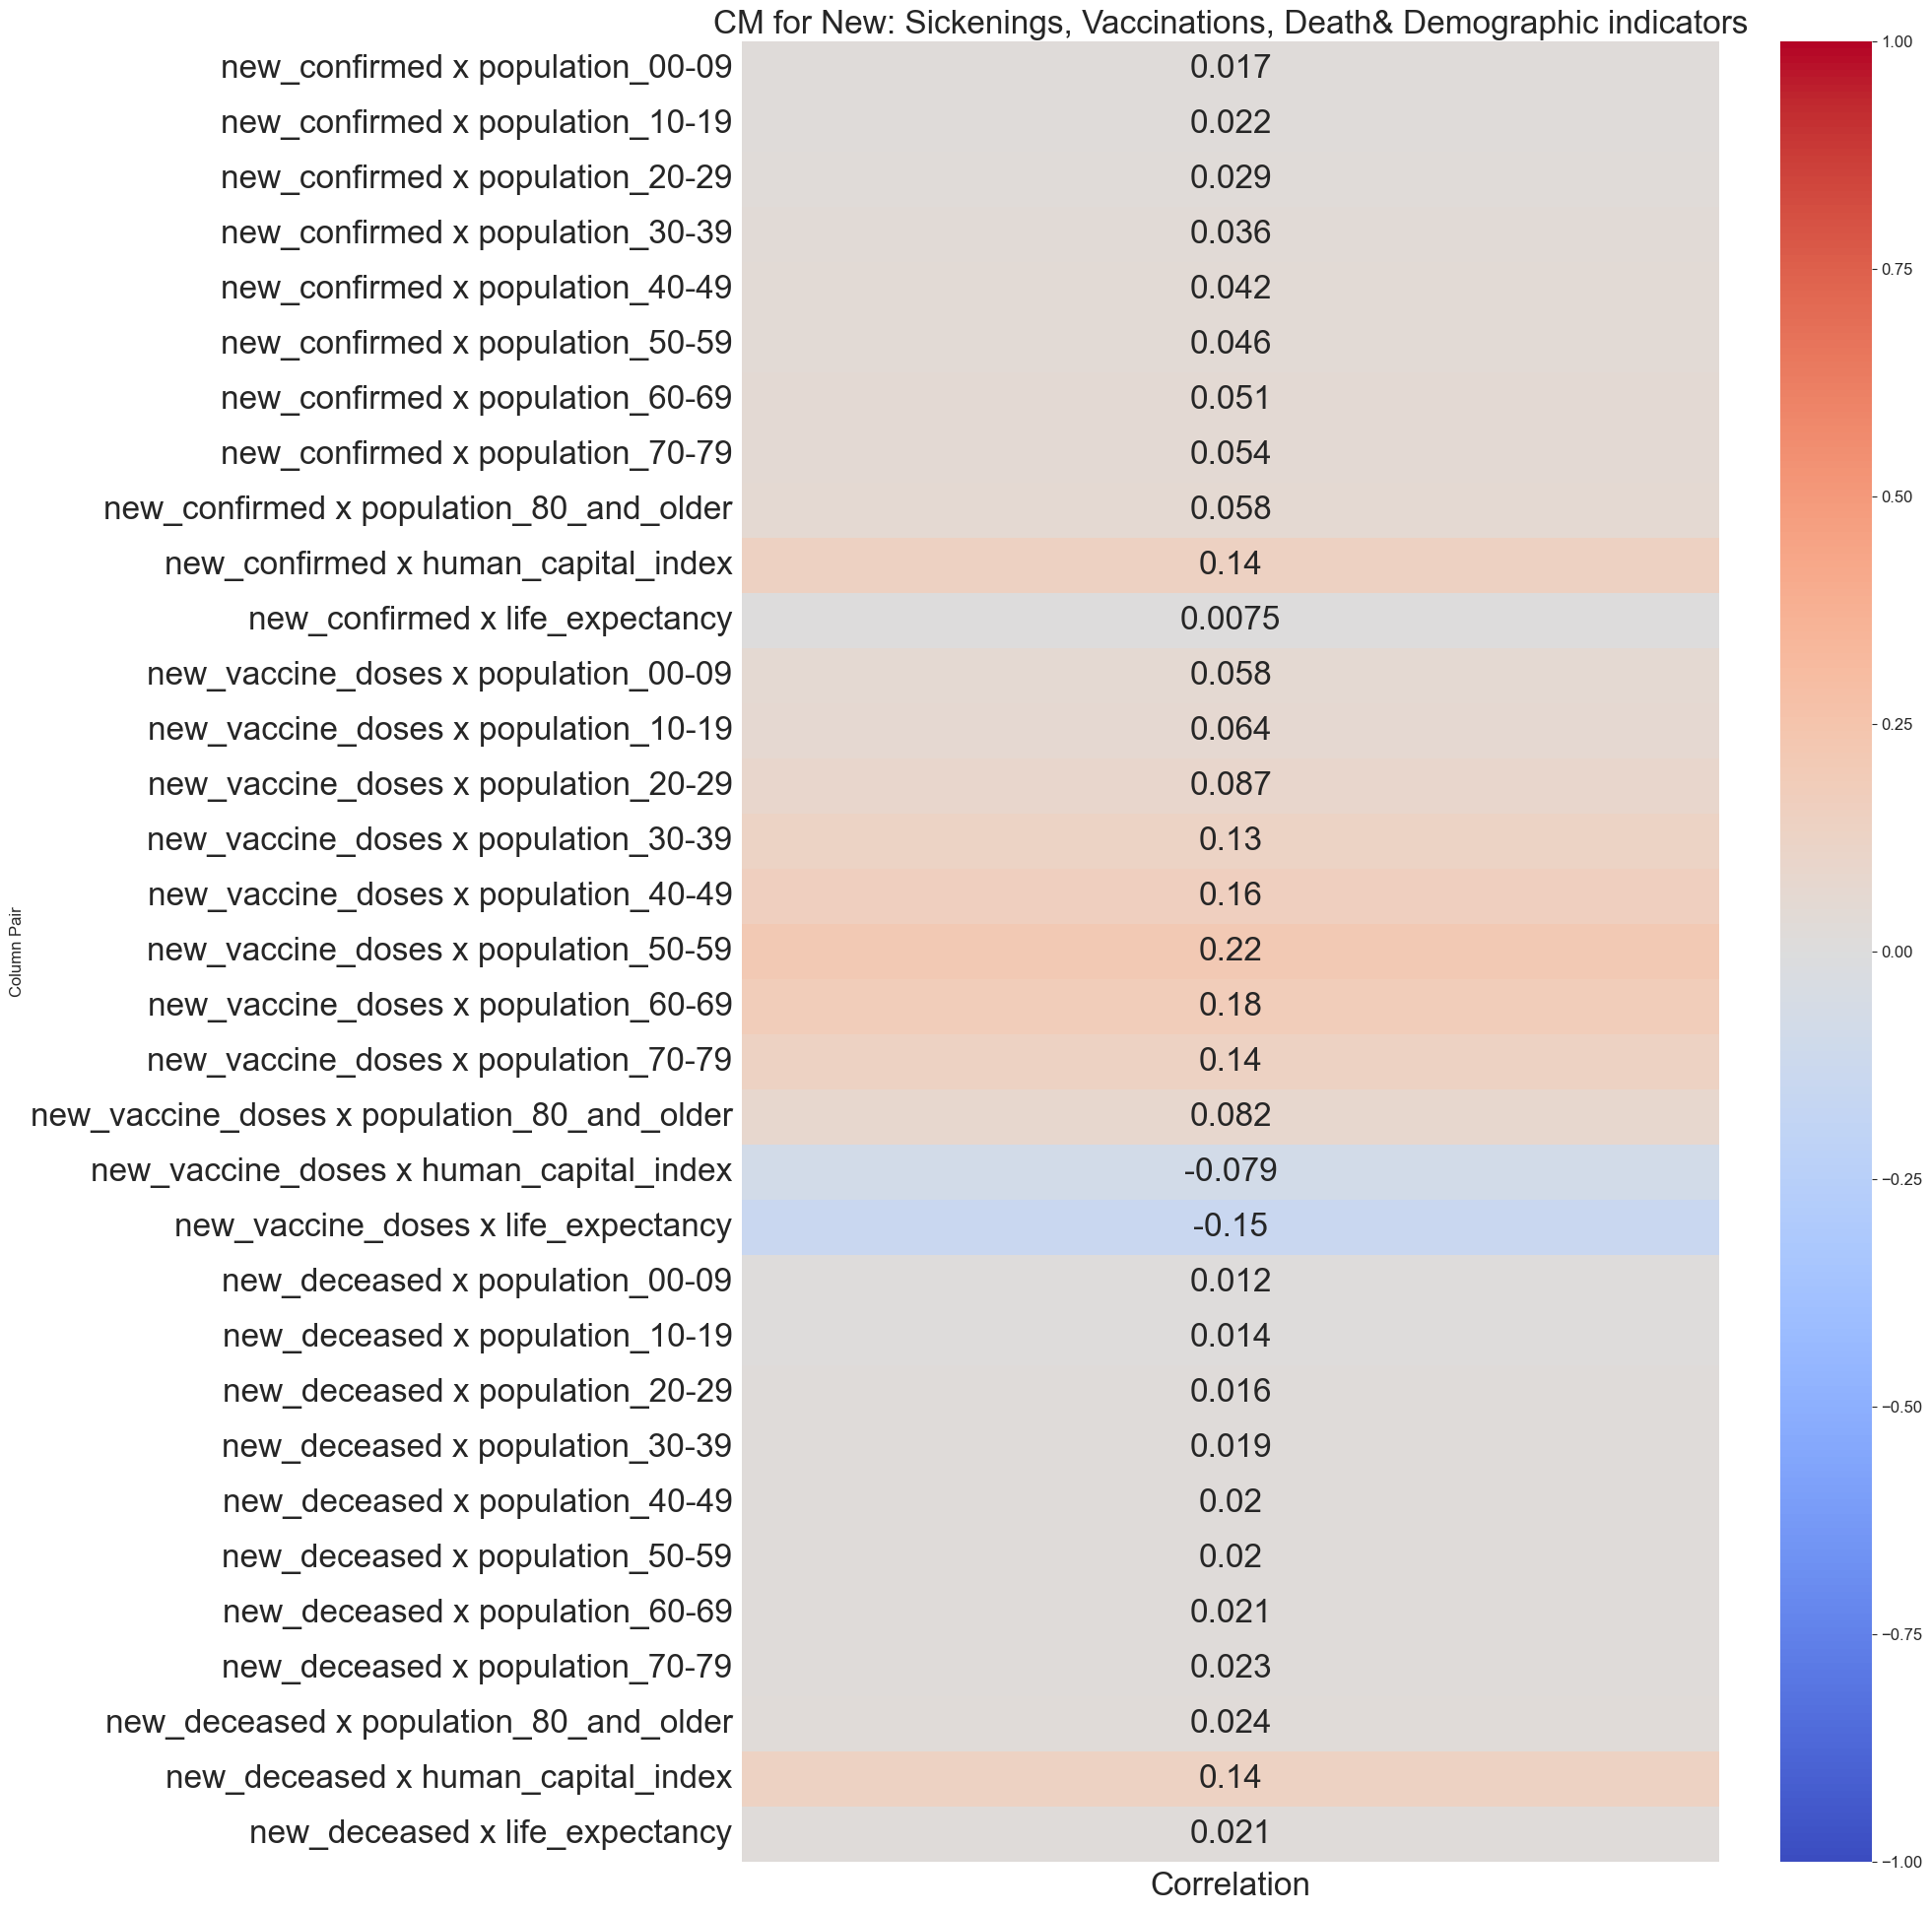

In [49]:
#2.5.4
plt.figure(figsize=(16, 24))
df_selected1 = combined_df[['new_confirmed', 'new_vaccine_doses_administered', 'new_deceased']]
df_selected2 = combined_df[['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older',
    'human_capital_index', 'life_expectancy']]
df_selected1.columns = ['new_confirmed ', 'new_vaccine_doses ', 'new_deceased ']
df_selected2.columns = [' population_00-09', ' population_10-19', ' population_20-29', ' population_30-39',
                        ' population_40-49', ' population_50-59', ' population_60-69', ' population_70-79',
                        ' population_80_and_older', ' human_capital_index', ' life_expectancy']
correlation_dict = {}
for col1 in df_selected1.columns:
    for col2 in df_selected2.columns:
        correlation_dict[f'{col1}x{col2}'] = df_selected1[col1].corr(df_selected2[col2])
correlation_matrix = pd.DataFrame(list(correlation_dict.items()), columns=['Column Pair', 'Correlation'])
correlation_matrix.set_index('Column Pair', inplace=True)
plt.title('CM for New: Sickenings, Vaccinations, Death'
          '& Demographic indicators', fontsize=24)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'size': 24})
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

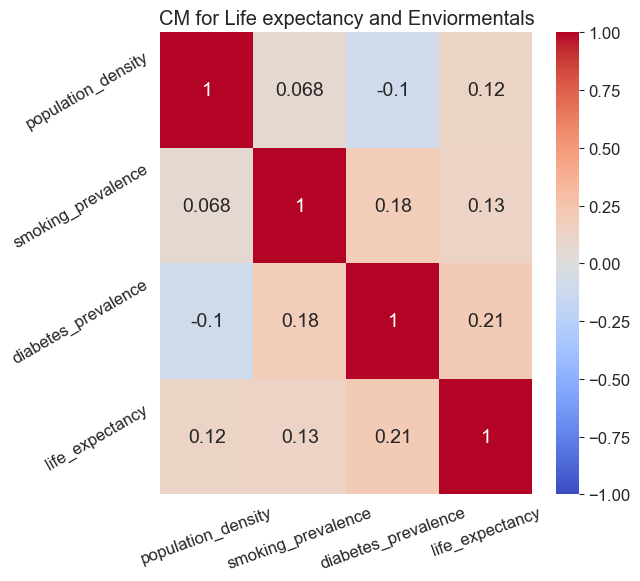

In [50]:
#2.5.5
plt.figure(figsize=(6, 6))
df_selected = combined_df[['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'life_expectancy']]
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'size': 14})
plt.title('CM for Life expectancy and Enviormentals')
plt.xticks(rotation=20)
plt.yticks(rotation=30)
plt.show()